# Objectif de la mission :

Mettre en place un algorithme capable de différencier automatiquement les vrais des faux billets

# Sommaire

**Partie 1 : Préparation de l'environnement et présentation des données**
 - <a href="#C1">I-1) Initialisation des librairies</a>
 - <a href="#C2">I-2) Importation, Description et Nettoyage des données</a>

 
**Partie 2 : Analyse descriptive des données**
- <a href="#C3"> II-1) Descriptions des vrais billets </a>
- <a href="#C4"> II-2) Descriptions des faux billets </a>
- <a href="#C5"> II-3) Comparaison Vrais-Faux</a>
- <a href="#C6"> II-4) Analyse en composantes principales</a>

**Partie 3 : Détermination des valeurs manquantes**

- <a href="#C8"> III-1) Régression Linéaire et ses conditions d'application </a>
- <a href="#C9"> III-2) Approche par Machine Learning</a>
- <a href="#C10"> III-3) Imputation des valeurs manquantes par la moyenne</a>

**Partie 4 : Prédiction des Vrais-Faux billets**

- <a href="#C11"> IV-1) Méthode des Kmeans </a>
- <a href="#C12"> IV-2) Méthode de la Régression Logistique </a>
- <a name="#C13"> IV-3) Utilisation d'Algorithmes Supervisés </a>


**Partie 5 : Application au jeu de donnée final**

# Partie 1 : Préparation de l'environnement et présentation des données

### <a name="C1">I-1) Initialisation des librairies de base </a>


https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### <a name="C2">I-2) Importation, Description et Nettoyage des données</a>

In [2]:
billets = pd.read_csv('billets.csv',sep=';')

In [3]:
print(billets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None


In [4]:
# Valeurs manquantes ? 
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [5]:
billets.loc[billets['margin_low'].isnull(),:]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


37 billets sans l'information margin_low. Pour commencer, nous pouvons mettre de coté ces lignes. 

In [6]:
# Création d'un DF des valeurs manquantes et retraits dans le jeu de donnée de l'étude
billet_na = billets.loc[billets['margin_low'].isnull(),:].copy()
billets_Filter=billets.dropna()

In [7]:
# Analyse des données dupliquées  
billets_Filter.loc[billets_Filter[['diagonal','height_left','height_right','margin_low','margin_up','length']].duplicated(keep=False),:]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


# Partie 2 : Analyse descriptive des données


L'analyse descriptive se fera séparément sur les vrais et les faux billets.

In [8]:
billets_Filter[(billets_Filter.is_genuine == True)].count()

is_genuine      971
diagonal        971
height_left     971
height_right    971
margin_low      971
margin_up       971
length          971
dtype: int64

In [9]:
Vrai_billets = billets_Filter[(billets_Filter.is_genuine == True)].copy()
Faux_billets = billets_Filter[(billets_Filter.is_genuine == False)].copy()

### <a name="C3"> II-1) Descriptions des vrais billets </a>

In [10]:
round(Vrai_billets.describe(),3)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,971.000,971.000,971.000,971.000,971.000,971.000
mean,171.988,103.952,103.809,4.116,3.053,113.203
std,0.301,0.302,0.289,0.319,0.185,0.356
min,171.040,103.140,102.910,2.980,2.270,111.760
25%,171.790,103.745,103.610,3.905,2.925,112.960
50%,171.990,103.950,103.810,4.110,3.050,113.200
75%,172.200,104.140,104.000,4.340,3.180,113.460
max,172.920,104.860,104.950,5.040,3.740,114.320


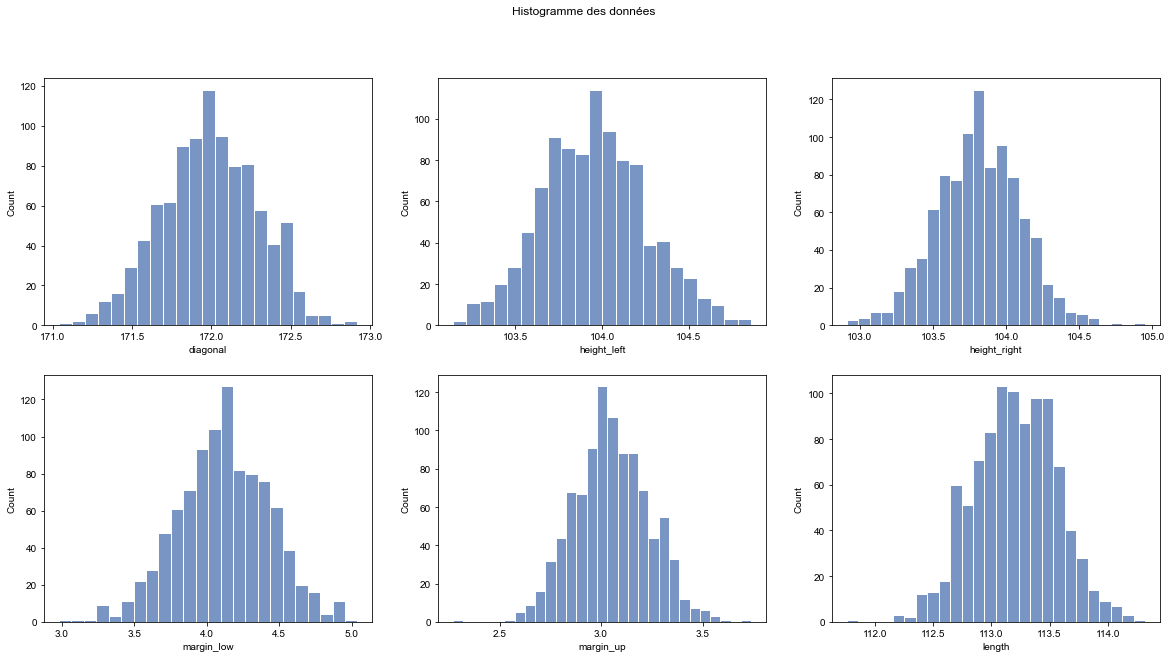

In [11]:

plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(2,3)
fig.suptitle('Histogramme des données')

sns.set(font_scale=1.5)
sns.histplot(ax=axes[0,0],data=Vrai_billets, x="diagonal")
sns.histplot(ax=axes[0,1],data=Vrai_billets, x="height_left")
sns.histplot(ax=axes[0,2],data=Vrai_billets, x="height_right")
sns.histplot(ax=axes[1,0],data=Vrai_billets, x="margin_low")
sns.histplot(ax=axes[1,1],data=Vrai_billets, x="margin_up")
sns.histplot(ax=axes[1,2],data=Vrai_billets, x="length")

plt.savefig('output.png')


In [12]:
corr = Vrai_billets[Vrai_billets.columns.drop('is_genuine')].corr()

corr.style.background_gradient(cmap='coolwarm')

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.074986,0.077807,0.038494,0.024928,0.010073
height_left,0.074986,1.000000,0.057166,0.006694,0.034361,-0.000921
height_right,0.077807,0.057166,1.000000,0.037338,-0.007900,0.029102
margin_low,0.038494,0.006694,0.037338,1.000000,-0.060485,0.038718
margin_up,0.024928,0.034361,-0.007900,-0.060485,1.000000,0.024671
length,0.010073,-0.000921,0.029102,0.038718,0.024671,1.000000


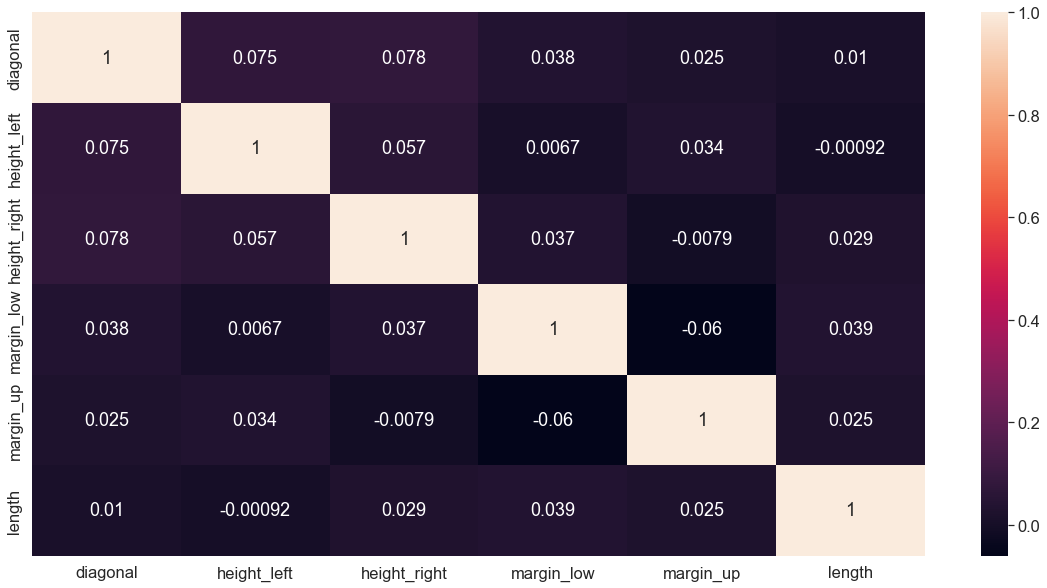

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

hm = sns.heatmap(corr, annot = True)

plt.show()

Il n'y a aucune corrélation entre les variables a priori. 

### <a name="C4"> II-2) Descriptions des faux billets </a>


In [14]:
round(Faux_billets.describe(),3)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,492.000,492.000,492.000,492.000,492.000,492.000
mean,171.901,104.189,104.143,5.216,3.352,111.632
std,0.305,0.224,0.272,0.554,0.179,0.615
min,171.040,103.510,103.430,3.820,2.920,109.490
25%,171.698,104.040,103.950,4.840,3.228,111.200
50%,171.910,104.180,104.160,5.190,3.350,111.630
75%,172.092,104.330,104.320,5.592,3.472,112.030
max,173.010,104.880,104.950,6.900,3.910,113.850


<AxesSubplot:xlabel='length', ylabel='Count'>

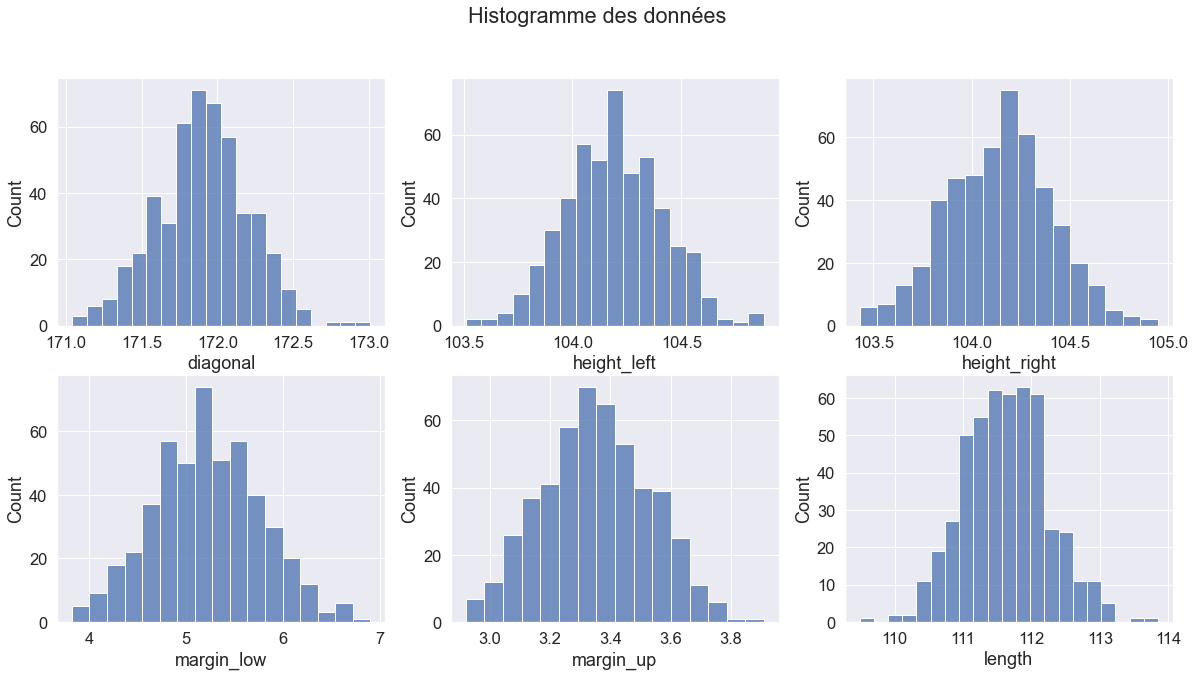

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(2,3)
fig.suptitle('Histogramme des données')

sns.set(font_scale=1.5)
sns.histplot(ax=axes[0,0],data=Faux_billets, x="diagonal")
sns.histplot(ax=axes[0,1],data=Faux_billets, x="height_left")
sns.histplot(ax=axes[0,2],data=Faux_billets, x="height_right")
sns.histplot(ax=axes[1,0],data=Faux_billets, x="margin_low")
sns.histplot(ax=axes[1,1],data=Faux_billets, x="margin_up")
sns.histplot(ax=axes[1,2],data=Faux_billets, x="length")

In [16]:
corr = Faux_billets[Faux_billets.columns.drop('is_genuine')].corr()

corr.style.background_gradient(cmap='coolwarm')

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.076302,0.002899,-0.064840,0.038483,-0.069603
height_left,0.076302,1.000000,0.090590,0.037827,-0.013502,0.020138
height_right,0.002899,0.090590,1.000000,-0.004271,0.060667,0.014726
margin_low,-0.064840,0.037827,-0.004271,1.000000,-0.142456,-0.030594
margin_up,0.038483,-0.013502,0.060667,-0.142456,1.000000,-0.040905
length,-0.069603,0.020138,0.014726,-0.030594,-0.040905,1.000000


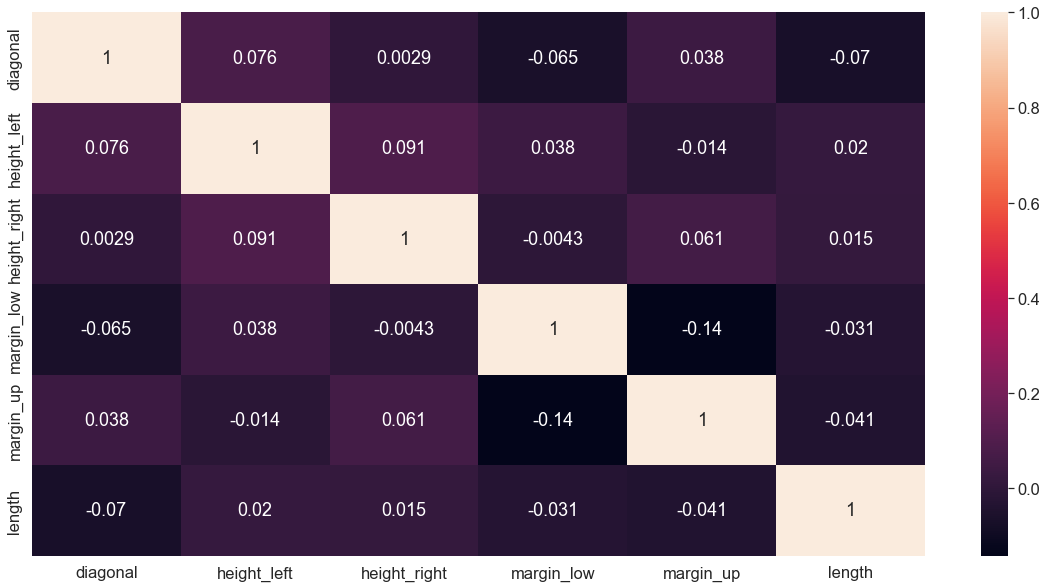

In [17]:
hm = sns.heatmap(corr, annot = True)

plt.show()

### <a name="C5"> II-3) Comparaison Vrais-Faux billets</a>


In [18]:
billetsF_long = pd.melt(billets_Filter, id_vars='is_genuine', value_vars=['diagonal', 'height_left','height_right','margin_low', 'margin_up', 'length'])
billetsF_long

,is_genuine,variable,value
0,True,diagonal,171.81
1,True,diagonal,171.46
2,True,diagonal,172.69
3,True,diagonal,171.36
4,True,diagonal,171.73
...,...,...,...
8773,False,length,111.28
8774,False,length,110.97
8775,False,length,111.95
8776,False,length,112.25


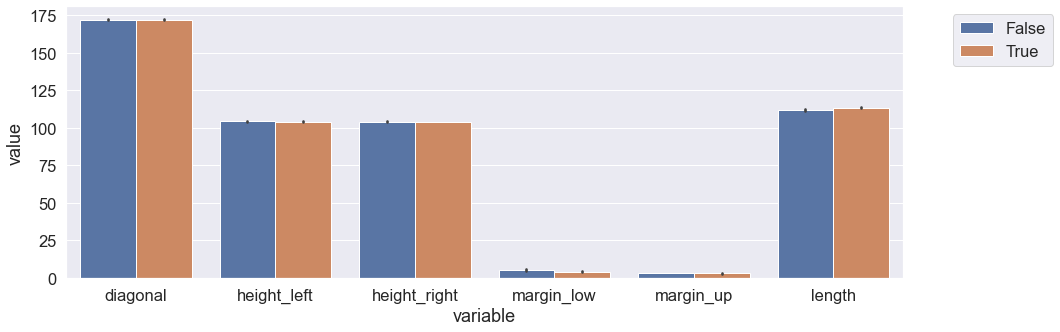

In [19]:


fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(data=billetsF_long, x='variable', y='value', hue='is_genuine', ci="sd", ax=ax,)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
billetsF_long.groupby(['is_genuine', 'variable']).agg({'value': ['mean', 'min', 'max']}).reset_index()

is_genuine      variable       value                
                                   mean     min     max
0       False      diagonal  171.901402  171.04  173.01
1       False   height_left  104.188537  103.51  104.88
2       False  height_right  104.143272  103.43  104.95
3       False        length  111.632114  109.49  113.85
4       False    margin_low    5.215935    3.82    6.90
5       False     margin_up    3.351504    2.92    3.91
6        True      diagonal  171.988476  171.04  172.92
7        True   height_left  103.951679  103.14  104.86
8        True  height_right  103.809094  102.91  104.95
9        True        length  113.203059  111.76  114.32
10       True    margin_low    4.116097    2.98    5.04
11       True     margin_up    3.052544    2.27    3.74

In [21]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.formula.api import ols


model = smf.ols('value ~ variable * C(is_genuine)', data=billetsF_long).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
#print(model.summary())



,sum_sq,df,F,PR(>F)
variable,3.249837e+07,5.0,5.865771e+07,0.000000e+00
C(is_genuine),5.291608e+00,1.0,4.775526e+01,5.166065e-12
variable:C(is_genuine),1.282021e+03,5.0,2.313975e+03,0.000000e+00
Residual,9.713325e+02,8766.0,NaN,NaN


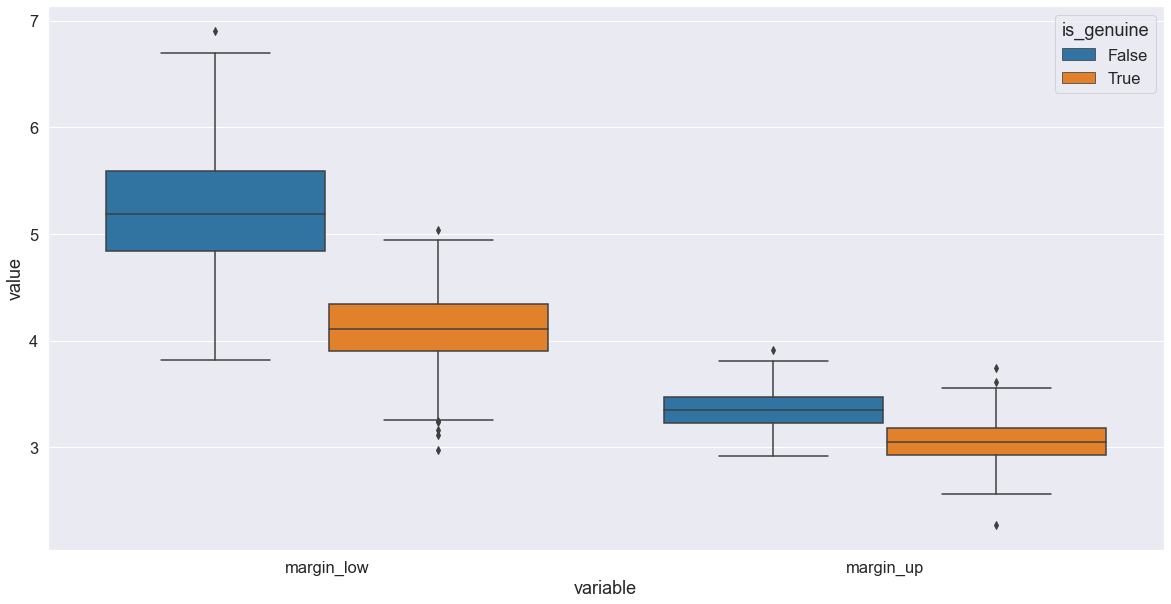

In [22]:
ax = sns.boxplot(x="variable", y="value", hue="is_genuine",
                 data=billetsF_long[(billetsF_long['variable']=='margin_low') | (billetsF_long['variable']=='margin_up')], 
                 palette="tab10"
                 )

#df = billetsF_long[(billetsF_long['variable']=='margin_low') | (billetsF_long['variable']=='margin_up')]

#billetsF_long["variable"] == ['margin_low' | 'margin_up']

### <a name="C6"> II-3) Analyse en composantes principales</a>


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X = billets_Filter[billets_Filter.columns.drop('is_genuine')].copy()

billets_Filter_Scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

model = PCA(n_components=6)
Billets_reduced = model.fit_transform(billets_Filter_Scaled)
Billets_reduced2 = pd.DataFrame(Billets_reduced)

np.cumsum(model.explained_variance_ratio_)

array([0.43123527, 0.60094179, 0.73230602, 0.8502277 , 0.9464313 ,
       1.        ])

In [24]:
import pickle

# Sauvegarde des modèles ajustés (fitted) en cas de besoins ultérieurs
Scaler_fitted = scaler.fit(X) 
PCA_fitted = PCA(n_components=6).fit(billets_Filter_Scaled)

pickle.dump(Scaler_fitted, open('Scaler_fitted.pkl', 'wb'))
pickle.dump(PCA_fitted, open('PCA_fitted.pkl', 'wb'))



In [25]:
model.explained_variance_ratio_

array([0.43123527, 0.16970651, 0.13136423, 0.11792169, 0.0962036 ,
       0.0535687 ])

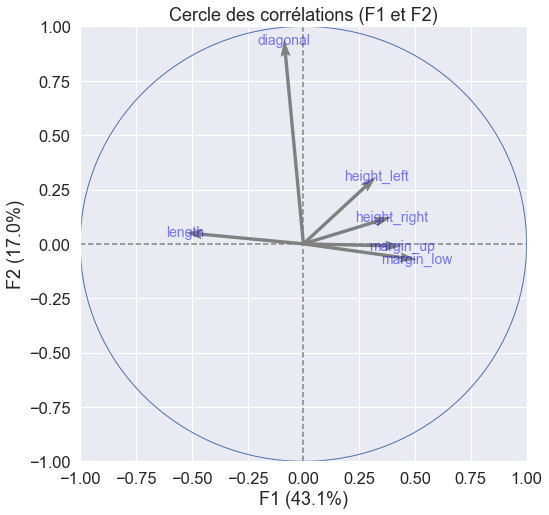

In [26]:

# Cercle des corrélations

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

            
pcs = model.components_
features = billets_Filter_Scaled.columns
display_circles(pcs, 2, model, [(0,1)],
  labels = np.array(features)
)


[Text(0.5, 0, 'F1'), Text(0, 0.5, 'F4')]

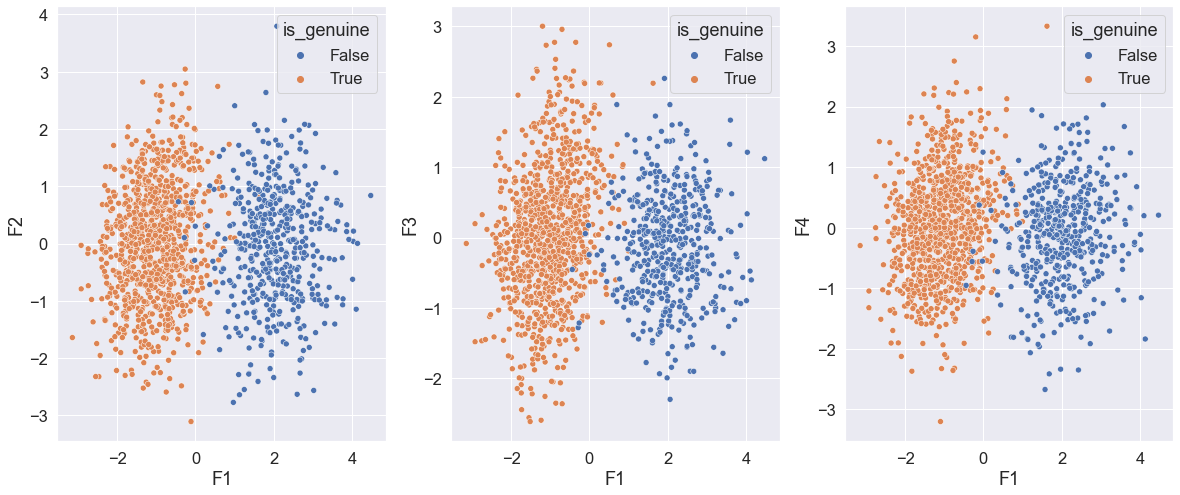

In [27]:
fig, axs = plt.subplots(ncols=3,figsize=(20,8))

p1=sns.scatterplot(x=Billets_reduced[:,0], y= Billets_reduced[:,1], hue=billets_Filter['is_genuine'],ax=axs[0])
p1.set( xlabel = "F1", ylabel = "F2")

p2=sns.scatterplot(x=Billets_reduced[:,0], y= Billets_reduced[:,2], hue=billets_Filter['is_genuine'],ax=axs[1])
p2.set( xlabel = "F1", ylabel = "F3")

p3=sns.scatterplot(x=Billets_reduced[:,0], y= Billets_reduced[:,3], hue=billets_Filter['is_genuine'],ax=axs[2])
p3.set( xlabel = "F1", ylabel = "F4")

# Partie 3 : Détermination des valeurs manquantes

Les faux billets ont, par définitions, des valeurs différentes des vrais billets et peuvent biaiser les résultats des modèles de prédictions. . De plus, la catégorie Vrai-Faux ne sera pas visible dans les prochains jeux de données. 

Dans cette partie, nous allons utiliser une régression linéaire sur les **Vrais billets** afin de déterminer s'il est possible de prédire efficacement les valeurs manquantes de la colonne margin_low. 

### <a name="C8"> III-1) Régression Linéaire et ses conditions d'application </a>

In [28]:
from sklearn.linear_model import LinearRegression


In [29]:
Xreg1 = Vrai_billets.drop(columns=['margin_low','is_genuine'])

yreg1 = Vrai_billets['margin_low']

In [30]:
# Pour plus de détail, on peut utiliser stats model
ModelReg1 = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=Vrai_billets).fit()
anova_table = sm.stats.anova_lm(ModelReg1, typ=2)
#anova_table
print(ModelReg1.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.544
Date:                Wed, 15 Jun 2022   Prob (F-statistic):              0.174
Time:                        10:44:17   Log-Likelihood:                -264.37
No. Observations:                 971   AIC:                             540.7
Df Residuals:                     965   BIC:                             570.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -10.4144      7.928     -1.314   

In [31]:
ModelReg2 = smf.ols('margin_low ~ margin_up ', data=Vrai_billets).fit()
anova_table = sm.stats.anova_lm(ModelReg2, typ=2)
#anova_table
print(ModelReg2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.558
Date:                Wed, 15 Jun 2022   Prob (F-statistic):             0.0596
Time:                        10:44:18   Log-Likelihood:                -266.46
No. Observations:                 971   AIC:                             536.9
Df Residuals:                     969   BIC:                             546.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4339      0.169     26.272      0.0

#### Vérification des conditions d'applications du modèle linéaires

b:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


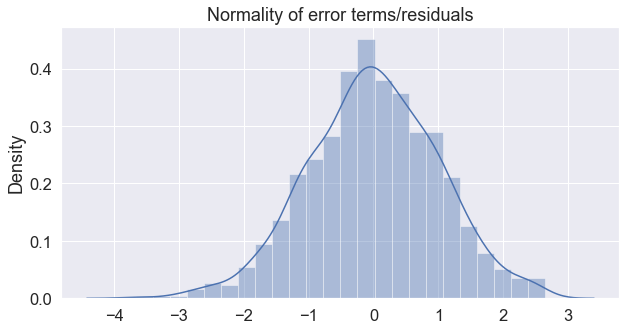

In [32]:
residues = ModelReg2.resid_pearson

plt.figure(figsize=(10,5))
p = sns.distplot(residues,kde=True)
p = plt.title('Normality of error terms/residuals')

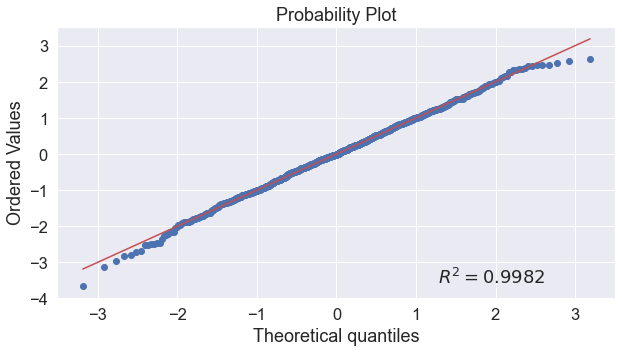

valeur de la statistique : 0.9980220794677734 , p-value : 0.31539738178253174


In [33]:
import scipy.stats as stats

plt.figure(figsize=(10,5))

normality_plot, stat = stats.probplot(residues, plot= plt, rvalue= True)
plt.show()

w, pvalue = stats.shapiro(residues)
print(f"valeur de la statistique : {w} , p-value : {pvalue}")

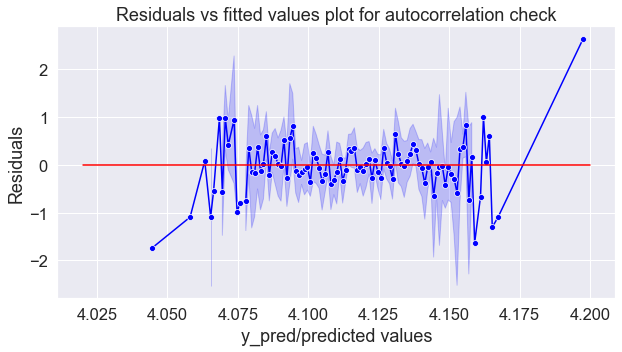

In [34]:
y_pred = ModelReg2.predict(Xreg1)

plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residues,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[4.02,4.2],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [35]:
from statsmodels.stats import diagnostic as diag
print('Null Hypothesis: Autocorrelation is absent.')
print('Alternative Hypothesis: Autocorrelation is present.')
min(diag.acorr_ljungbox(residues , lags = 40,return_df=False)[1])

Null Hypothesis: Autocorrelation is absent.
Alternative Hypothesis: Autocorrelation is present.


0.2549316394653557

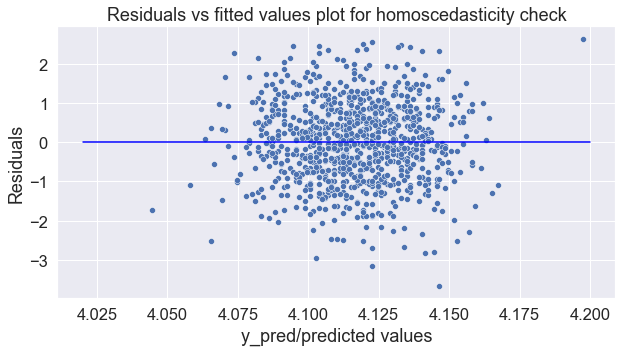

In [36]:
plt.figure(figsize=(10,5))

p = sns.scatterplot(x=y_pred,y=residues)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
#plt.xlim(0,26)
p = sns.lineplot(x=[4.02,4.2],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [37]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residues, Xreg1)
print('Null Hypothesis: Error terms are homoscedastic.')
print('Alternative Hypothesis: Error terms are heteroscedastic.')
lzip(name, test)

Null Hypothesis: Error terms are homoscedastic.
Alternative Hypothesis: Error terms are heteroscedastic.


[('F statistic', 1.0619808291465525), ('p-value', 0.25503001821447974)]

Notons une tendance de corrélation négative entre margin_low et margin_up. Cependant le coefficient de détermination R2 est extrêmement faible. Cela signifie que l'ecart entre les valeurs des données et les valeurs prédites sont similaire à la variance des données. 

Il est donc déconseillé d'utiliser une régression linéaire pour tenter de prédire les valeurs manquantes de margin_low. 

## <a name="C9"> III-2) Approche par Machine Learning</a>

+ Régression Linéaire
+ Lasso
+ ElasticNet
+ SVR
+ RidgeRegression
+ EnsembleRegressor (random forest, GradientBoostingRegressor)

+ Voting

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# test sur les données centrées réduites

billets_Vrais_Scaled = pd.DataFrame(scaler.transform(Vrai_billets.drop(columns=['is_genuine'])), columns=Vrai_billets.drop(columns=['is_genuine']).columns)

XregS = billets_Vrais_Scaled.drop(columns=['margin_low'])

yregS = billets_Vrais_Scaled['margin_low']

X_train, X_test, y_train, y_test = train_test_split(XregS, yregS, test_size = .20, random_state = 42)

##### Régression linéaire

In [40]:
regr1ML = LinearRegression() 

regr1ML.fit(X_train, y_train)

predicted = regr1ML.predict(X_test)

print(regr1ML.score(X_test,y_test))

erreurs = abs(predicted - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')


-0.018747129133936058
Mean Absolute Error: 0.4
Mean Absolute Percentage Error : 18.45 %.


In [41]:
from sklearn.model_selection import GridSearchCV


##### Le modèle Lasso

In [42]:
from sklearn.linear_model import Lasso

In [43]:
param_grid ={
        'alpha': np.arange(1,50)
}
gridLasso = GridSearchCV(Lasso(),param_grid, cv=5)

gridLasso.fit(X_train,y_train)

#Prédiction
Predict_Lasso=gridLasso.predict(X_test)


print (gridLasso.best_score_)
print (gridLasso.best_params_)

#Score
print (gridLasso.score(X_test,y_test))

erreurs = abs(Predict_Lasso - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

-0.009086143391088219
{'alpha': 1}
-6.032677317691082e-07
Mean Absolute Error: 0.39
Mean Absolute Percentage Error : 21.2 %.


##### Le modèle Elastic

In [44]:
from sklearn.linear_model import ElasticNet

In [45]:
param_grid ={
        'alpha': np.arange(1,10),
}
gridElastic = GridSearchCV(ElasticNet(),param_grid, cv=5)

gridElastic.fit(X_train,y_train)

print(gridElastic.best_score_)
print(gridElastic.best_params_)

#Prédiction
Predict_Elastic=gridElastic.predict(X_test)


#Score
print(gridElastic.score(X_test,y_test))

erreurs = abs(Predict_Elastic - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

-0.009086143391088219
{'alpha': 1}
-6.032677317691082e-07
Mean Absolute Error: 0.39
Mean Absolute Percentage Error : 21.2 %.


##### Le modèle SVR

In [46]:
from sklearn.svm import SVR

In [47]:
param_grid ={
    'kernel': ['poly','rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto'],
    'C': np.arange(1,10)
}
gridSVR = GridSearchCV(SVR(),param_grid, cv=5)

gridSVR.fit(X_train,y_train)


print (gridSVR.best_score_)
print(gridSVR.best_params_)


#Prédiction
Predict_SVR=gridSVR.predict(X_test)


#Score
print(gridSVR.score(X_test,y_test))

erreurs = abs(Predict_SVR - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')


-0.06839809893481703
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
-0.1461071179254232
Mean Absolute Error: 0.42
Mean Absolute Percentage Error : 18.56 %.


##### Le modèle ridge

In [48]:
from sklearn.linear_model import Ridge

In [49]:
param_grid ={
        'alpha': np.arange(0,50),
}
gridRidge = GridSearchCV(Ridge(),param_grid, cv=5)

gridRidge.fit(X_train,y_train)

#Prédiction
Predict_Ridge=gridRidge.predict(X_test)

print (gridRidge.best_score_)
print(gridRidge.best_params_)

#Score
print(gridRidge.score(X_test,y_test))

erreurs = abs(Predict_Ridge - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

-0.011947440141333088
{'alpha': 49}
-0.014997848788501189
Mean Absolute Error: 0.39
Mean Absolute Percentage Error : 19.41 %.


##### Le modèle random forest

In [50]:
from sklearn.ensemble import RandomForestRegressor


In [51]:

param_grid ={
    'n_estimators': np.arange(1,60)
}
gridFRR = GridSearchCV(RandomForestRegressor(),param_grid, cv=5)

gridFRR.fit(X_train,y_train)

#Prédiction
Predict_RF=gridFRR.predict(X_test)

print (gridFRR.best_score_)
print(gridFRR.best_params_)

#Score
print(gridFRR.score(X_test,y_test))

erreurs = abs(Predict_RF - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')


-0.06821156614960597
{'n_estimators': 34}
-0.22199146597208563
Mean Absolute Error: 0.43
Mean Absolute Percentage Error : -10.81 %.


In [52]:
y_train.median()

-0.5514994981314761

In [53]:
#Median

Predict_median = y_test.apply(lambda v: y_train.median())

erreurs = abs(Predict_median - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')


Mean Absolute Error: 0.39
Mean Absolute Percentage Error : 20.92 %.


In [54]:
#Mean
Predict_mean = y_test.apply(lambda v: y_train.mean())

erreurs = abs(Predict_mean - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Error: 0.39
Mean Absolute Percentage Error : 21.2 %.


Bilan : Auncun modèle n'est performant. Il semble équivalent (voir mieux dans certains cas) de remplacer les NA par la moyenne de la variable. 

### <a name="C10"> III-3) Imputation des valeurs manquantes par la moyenne</a>


In [55]:
from sklearn.impute import SimpleImputer 

#Paramétrage de l'imputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

#ajustement de l'imputer aux données (fit)
Imputer_fitted=imputer.fit(Vrai_billets.drop(columns=['is_genuine']))

#Imputation des données manquantes
Billets_P=Imputer_fitted.transform(billets.drop(columns=['is_genuine'])).copy()

#reformation d'un Dataframe avec le nom des colonnes et is_genuine
Billets_P = pd.DataFrame(Billets_P, columns = billets.drop(columns=['is_genuine']).columns)
Billets_P = pd.concat([Billets_P,billets['is_genuine']], axis=1)

# Sauvegarde des paramètres de l'imputeur
pickle.dump(Imputer_fitted, open('Imputer_fitted.pkl', 'wb'))


# Partie 4 : Prédiction des Vrais-Faux billets


### <a name="C11"> IV-1) Méthode des Kmeans </a>

#### a ) Sur les données filtrées (sans NaN)

In [56]:
X = billets_Filter.drop(columns=['is_genuine'])

y = billets_Filter['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

b:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[[ 95   1]
 [  0 197]]
Score du modèle: -176.23953637994288


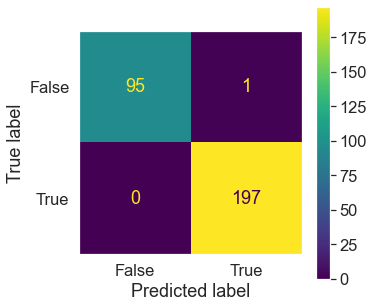

In [57]:
from sklearn import metrics

from sklearn.cluster import KMeans
kmeansF = KMeans(n_clusters=2, random_state=0).fit(X_train)

predictions = kmeansF.predict(X_test)
predictions = np.where(predictions == 0, True, False)

#df['value'] = np.where(df['value'] > 20000, 0, df['value'])
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

score = kmeansF.score(X_test, y_test)
print('Score du modèle:',score)

plt.rcParams["figure.figsize"] = (5,5)

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)





#### b ) Sur les données totales

In [58]:
X = Billets_P.drop(columns=['is_genuine'])

y = Billets_P['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

b:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[[104   6]
 [  0 190]]
Score du modèle: -192.28323586185488


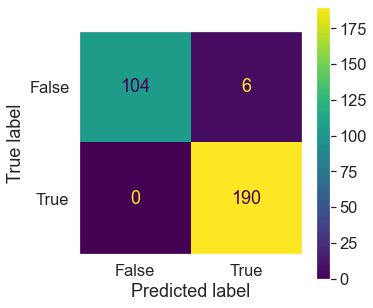

In [59]:
from sklearn import metrics

from sklearn.cluster import KMeans
kmeansT = KMeans(n_clusters=2, random_state=0).fit(X_train)

predictions = kmeansT.predict(X_test)
predictions = np.where(predictions == 1, True, False)

#df['value'] = np.where(df['value'] > 20000, 0, df['value'])
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

score = kmeansT.score(X_test, y_test)
print('Score du modèle:',score)

plt.rcParams["figure.figsize"] = (5,5)

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)



In [60]:
kmeansT.cluster_centers_

array([[171.90181818, 104.19208556, 104.14740642,   5.22231706,
          3.35173797, 111.55994652],
       [171.98208232, 103.95710654, 103.81697337,   4.12103199,
          3.06001211, 113.20176755]])

In [61]:
centroids = pd.DataFrame(kmeansT.cluster_centers_, columns=Billets_P.drop(columns=['is_genuine']).columns)
centroids

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.901818,104.192086,104.147406,5.222317,3.351738,111.559947
1,171.982082,103.957107,103.816973,4.121032,3.060012,113.201768


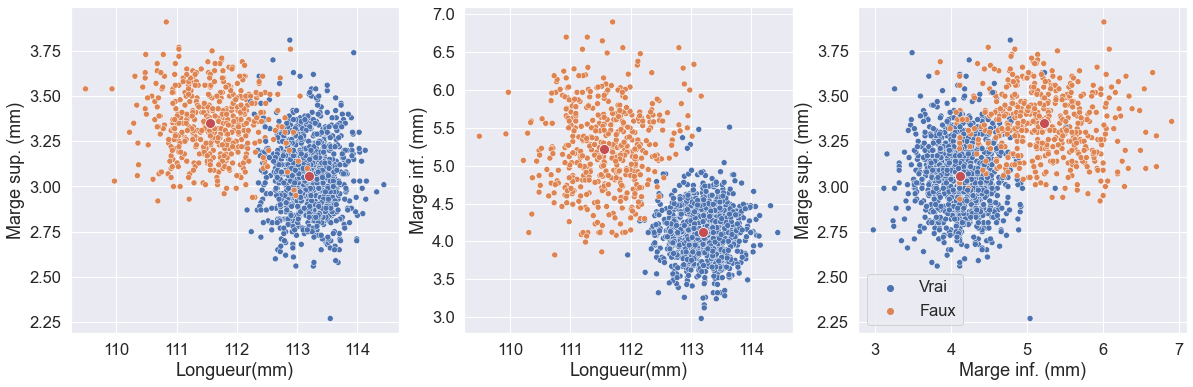

In [62]:
Pred_kmeansT = kmeansT.predict(X)
Pred_kmeansT = np.where(Pred_kmeansT == 1, 'Vrai', 'Faux')
Pred_kmeansT = pd.Series(Pred_kmeansT)

billets_kmeans = pd.concat([Billets_P,
                            Pred_kmeansT.rename('Type_billet_kmeansT')], axis=1)

fig, axs = plt.subplots(ncols=3,figsize=(20,6))

p1=sns.scatterplot(data = billets_kmeans, x='length', y= 'margin_up', hue='Type_billet_kmeansT',ax=axs[0],legend = False)
p1.set( xlabel = "Longueur(mm)", ylabel = "Marge sup. (mm)")
p1=sns.scatterplot(data = centroids, x='length', y='margin_up', color = 'r',s=100,ax=axs[0])


p2=sns.scatterplot(data = billets_kmeans, x='length', y= 'margin_low', hue='Type_billet_kmeansT',ax=axs[1],legend = False)
p2.set( xlabel = "Longueur(mm)", ylabel = "Marge inf. (mm)")
p2=sns.scatterplot(data = centroids, x='length', y='margin_low', color = 'r',s=100, ax=axs[1])

p3=sns.scatterplot(data = billets_kmeans, x='margin_low', y='margin_up', hue='Type_billet_kmeansT',ax=axs[2])
p3.set( xlabel = "Marge inf. (mm)", ylabel = "Marge sup. (mm)")
p3=sns.scatterplot(data = centroids, x='margin_low', y='margin_up', color = 'r',s=100,ax=axs[2])

#### c ) Sur les données totales Standardisées

In [63]:
Billets_P_S = pd.DataFrame(Scaler_fitted.transform(Billets_P.drop(columns=['is_genuine'])), columns=Billets_P.drop(columns=['is_genuine']).columns)


X = Billets_P_S

y = Billets_P['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

b:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[[109   1]
 [  2 188]]
Score du modèle: -1114.818934563358


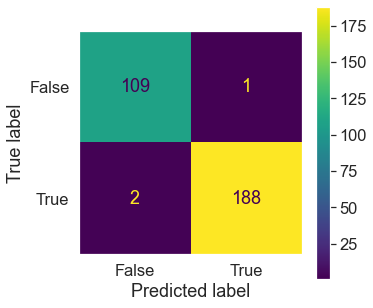

In [64]:
from sklearn import metrics

from sklearn.cluster import KMeans
kmeansTS = KMeans(n_clusters=2, random_state=0).fit(X_train)

predictions = kmeansTS.predict(X_test)
predictions = np.where(predictions == 1, True, False)

#df['value'] = np.where(df['value'] > 20000, 0, df['value'])
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

score = kmeansTS.score(X_test, y_test)
print('Score du modèle:',score)

plt.rcParams["figure.figsize"] = (5,5)

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)





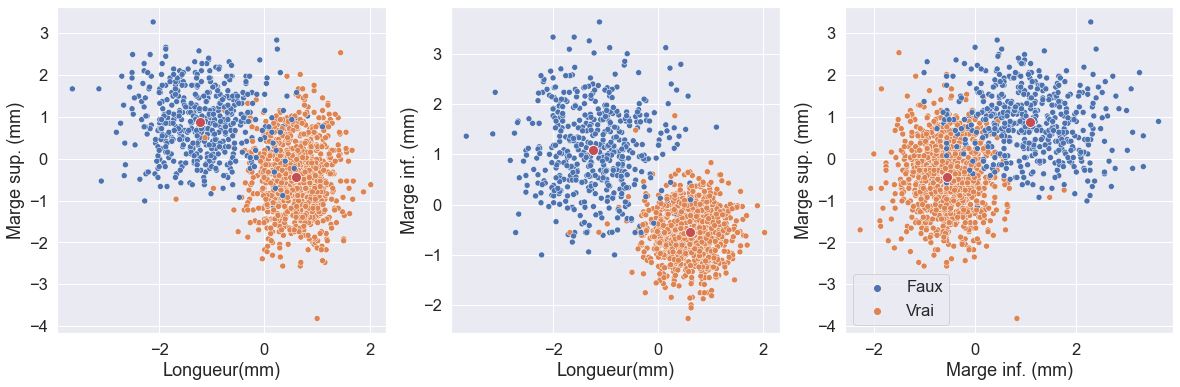

In [65]:
centroids = pd.DataFrame(kmeansTS.cluster_centers_, columns=Billets_P_S.columns)

Pred_kmeansS = kmeansTS.predict(X)
Pred_kmeansS = np.where(Pred_kmeansS == 1, 'Vrai', 'Faux')
Pred_kmeansS = pd.Series(Pred_kmeansS)

billets_kmeans = pd.concat([Billets_P_S,
                            Pred_kmeansS.rename('Type_billet_kmeansS')], axis=1)

fig, axs = plt.subplots(ncols=3,figsize=(20,6))

p1=sns.scatterplot(data = billets_kmeans, x='length', y= 'margin_up', hue='Type_billet_kmeansS',ax=axs[0],legend = False)
p1.set( xlabel = "Longueur(mm)", ylabel = "Marge sup. (mm)")
p1=sns.scatterplot(data = centroids, x='length', y='margin_up', color = 'r',s=100,ax=axs[0])


p2=sns.scatterplot(data = billets_kmeans, x='length', y= 'margin_low', hue='Type_billet_kmeansS',ax=axs[1],legend = False)
p2.set( xlabel = "Longueur(mm)", ylabel = "Marge inf. (mm)")
p2=sns.scatterplot(data = centroids, x='length', y='margin_low', color = 'r',s=100, ax=axs[1])

p3=sns.scatterplot(data = billets_kmeans, x='margin_low', y='margin_up', hue='Type_billet_kmeansS',ax=axs[2])
p3.set( xlabel = "Marge inf. (mm)", ylabel = "Marge sup. (mm)")
p3=sns.scatterplot(data = centroids, x='margin_low', y='margin_up', color = 'r',s=100,ax=axs[2])

#### d ) Sur les axes de l'ACP

In [66]:
Billets_P_PCA = pd.DataFrame(PCA_fitted.transform(Billets_P_S))


X = Billets_P_PCA

y = Billets_P['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

b:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[[109   1]
 [  2 188]]
Score du modèle: -1114.8189345633577


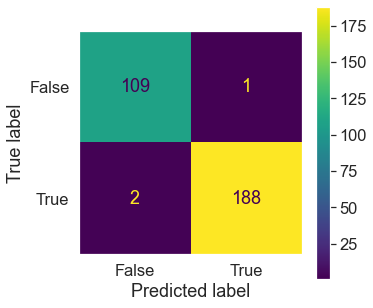

In [67]:
from sklearn import metrics

from sklearn.cluster import KMeans
kmeansTSP = KMeans(n_clusters=2, random_state=0).fit(X_train)

predictions = kmeansTSP.predict(X_test)
predictions = np.where(predictions == 1, True, False)

#df['value'] = np.where(df['value'] > 20000, 0, df['value'])
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

score = kmeansTSP.score(X_test, y_test)
print('Score du modèle:',score)

plt.rcParams["figure.figsize"] = (5,5)

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)





## <a name="C12"> IV-2) Méthode de la Régression Logistique </a>


### a ) Sur les données filtrées (sans NaN)

In [68]:
# importing libraries
import statsmodels.api as sm
import pandas as pd 
  
# loading the training dataset 
X = billets_Filter.drop(columns=['is_genuine'])

y = billets_Filter['is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

   
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.027098
         Iterations 12


In [69]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1463
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Jun 2022   Pseudo R-squ.:                  0.9576
Time:                        10:45:13   Log-Likelihood:                -39.644
converged:                       True   LL-Null:                       -934.20
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal        -0.4755      0.727     -0.654      0.513      -1.901       0.950
height_left     -1.5227      1.053     -1.446      0.148      -3.587       0.541
height_right    -3.4686      1.145     -3.03

Coefficient de détermination R2 du modèle : 1.0
 
Matrice de confusion :
[[ 96   0]
 [  0 197]]


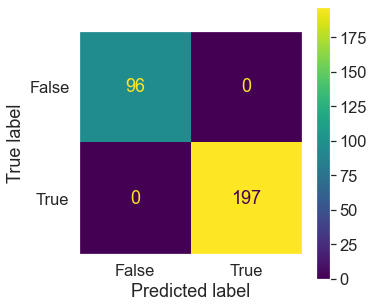

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

logisticRegr1a = LogisticRegression()
logisticRegr1a.fit(X_train, y_train)

predictions = logisticRegr1a.predict(X_test)

score = logisticRegr1a.score(X_test, y_test)
print('Coefficient de détermination R2 du modèle :',score)
print(' ')

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)

### b ) Sur les données totales

In [71]:
X = Billets_P.drop(columns=['is_genuine'])

y = Billets_P['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

Coefficient de détermination R2 du modèle : 0.99
 
Matrice de confusion :
[[107   3]
 [  0 190]]


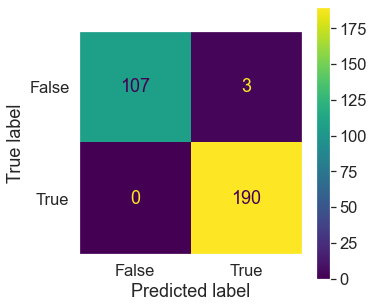

In [72]:
logisticRegrT = LogisticRegression()
logisticRegrT.fit(X_train, y_train)

predictions = logisticRegrT.predict(X_test)

score = logisticRegrT.score(X_test, y_test)
print('Coefficient de détermination R2 du modèle :',score)
print(' ')

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)

### c ) Sur les données totales Standardisées

In [73]:

X = Billets_P_S

y = Billets_P['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

Coefficient de détermination R2 du modèle : 0.99
 
Matrice de confusion :
[[108   2]
 [  1 189]]


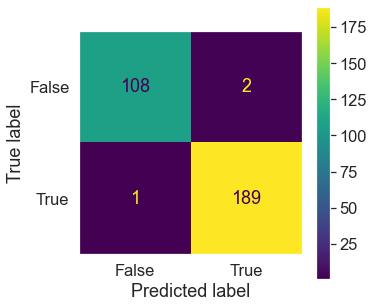

In [74]:
logisticRegrTS = LogisticRegression()
logisticRegrTS.fit(X_train, y_train)

predictions = logisticRegrTS.predict(X_test)

score = logisticRegrTS.score(X_test, y_test)
print('Coefficient de détermination R2 du modèle :',score)
print(' ')

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)

### d ) Sur les axes de la PCA

In [75]:

X = Billets_P_PCA

y = Billets_P['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

Coefficient de détermination R2 du modèle : 0.99
 
Matrice de confusion :
[[108   2]
 [  1 189]]


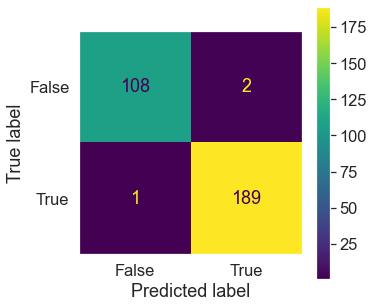

In [76]:
logisticRegrTSPCA = LogisticRegression()
logisticRegrTSPCA.fit(X_train, y_train)

predictions = logisticRegrTSPCA.predict(X_test)

score = logisticRegrTSPCA.score(X_test, y_test)
print('Coefficient de détermination R2 du modèle :',score)
print(' ')

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)

## <a name="C13"> IV-3) Utilisation d'Algorithmes Supervisés </a>


### a ) Sur les données totales

In [77]:
X = Billets_P.drop(columns=['is_genuine'])

y = Billets_P['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

meilleur score de précision:  0.99
meilleurs paramètres :  {'n_neighbors': 3, 'p': 1}
Score sur les données tests  0.9933333333333333
Matrice de confusion :
[[108   2]
 [  0 190]]


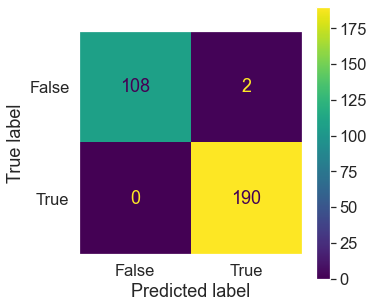

In [78]:
from sklearn.neighbors import KNeighborsClassifier

param_grid ={
    'p': [1, 2],
    'n_neighbors': np.arange(1,20)
}
gridKNNT = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

gridKNNT.fit(X_train,y_train)

print('meilleur score de précision: ',gridKNNT.best_score_)
print('meilleurs paramètres : ',gridKNNT.best_params_)
print('Score sur les données tests ',gridKNNT.score(X_test,y_test))

predictions = gridKNNT.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)


meilleur score de précision :  0.99
meilleurs paramètres :  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 19}
Score sur les données tests  0.9866666666666667
Matrice de confusion :
[[106   4]
 [  0 190]]


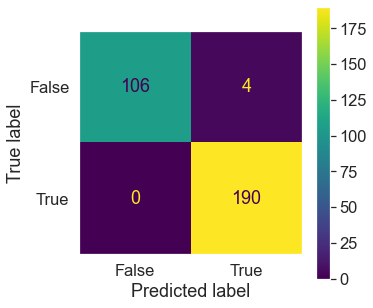

In [79]:
from sklearn.ensemble import RandomForestClassifier
param_grid ={
    'criterion' : ['gini','entropy', 'log_loss'],
    'max_features': ["sqrt", "log2"],
    'n_estimators': np.arange(1,20)
}
gridRFT = GridSearchCV(RandomForestClassifier( random_state = 42),param_grid, cv=5)

gridRFT.fit(X_train,y_train)

print('meilleur score de précision : ',gridRFT.best_score_)
print('meilleurs paramètres : ',gridRFT.best_params_)
print('Score sur les données tests ',gridRFT.score(X_test,y_test))

predictions = gridRFT.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)

### b ) Sur les Standardisées

In [80]:
X = Billets_P_S

y = Billets_P['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

meilleur score de précision :  0.9908333333333333
meilleurs paramètres :  {'n_neighbors': 8, 'p': 2}
Score sur les données tests  0.9866666666666667
Matrice de confusion :
[[106   4]
 [  0 190]]


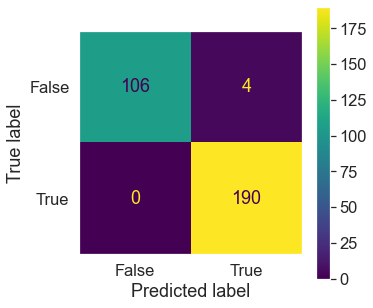

In [81]:
from sklearn.neighbors import KNeighborsClassifier

param_grid ={
    'p': [1, 2],
    'n_neighbors': np.arange(1,20)
}
gridKNNTS = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

gridKNNTS.fit(X_train,y_train)

print('meilleur score de précision : ',gridKNNTS.best_score_)
print('meilleurs paramètres : ',gridKNNTS.best_params_)
print('Score sur les données tests ',gridKNNTS.score(X_test,y_test))

predictions = gridKNNTS.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)


meilleur score de précision :  0.99
meilleurs paramètres :  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 19}
Score sur les données tests  0.9866666666666667
Matrice de confusion :
[[106   4]
 [  0 190]]


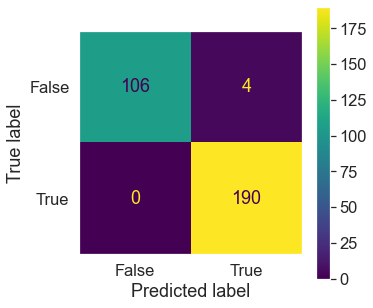

In [82]:
from sklearn.ensemble import RandomForestClassifier
param_grid ={
    'criterion' : ['gini','entropy', 'log_loss'],
    'max_features': ["sqrt", "log2"],
    'n_estimators': np.arange(1,20)
}
gridRFTS = GridSearchCV(RandomForestClassifier( random_state = 42),param_grid, cv=5)

gridRFTS.fit(X_train,y_train)

print('meilleur score de précision : ',gridRFTS.best_score_)
print('meilleurs paramètres : ',gridRFTS.best_params_)
print('Score sur les données tests ',gridRFTS.score(X_test,y_test))

predictions = gridRFTS.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)

### c ) Sur les Axes de la PCA

In [83]:
X = Billets_P_PCA

y = Billets_P['is_genuine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

meilleur score de précision:  0.9908333333333333
meilleurs paramètres :  {'n_neighbors': 8, 'p': 2}
Score sur les données tests  0.9866666666666667
Matrice de confusion :
[[106   4]
 [  0 190]]


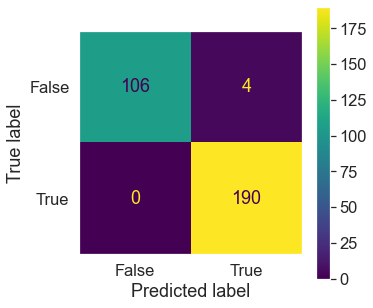

In [84]:
from sklearn.neighbors import KNeighborsClassifier

param_grid ={
    'p': [1, 2],
    'n_neighbors': np.arange(1,20)
}
gridKNNTPCA = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

gridKNNTPCA.fit(X_train,y_train)

print('meilleur score de précision: ',gridKNNTPCA.best_score_)
print('meilleurs paramètres : ',gridKNNTPCA.best_params_)
print('Score sur les données tests ',gridKNNTPCA.score(X_test,y_test))

predictions = gridKNNTPCA.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)


meilleur score de précision :  0.9866666666666667
meilleurs paramètres :  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 9}
Score sur les données tests  0.98
Matrice de confusion :
[[107   3]
 [  3 187]]


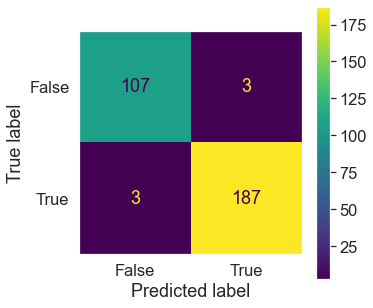

In [85]:
from sklearn.ensemble import RandomForestClassifier
param_grid ={
    'criterion' : ['gini','entropy', 'log_loss'],
    'max_features': ["sqrt", "log2"],
    'n_estimators': np.arange(1,20)
}
gridRFTPCA = GridSearchCV(RandomForestClassifier( random_state = 42),param_grid, cv=5)

gridRFTPCA.fit(X_train,y_train)

print('meilleur score de précision : ',gridRFTPCA.best_score_)
print('meilleurs paramètres : ',gridRFTPCA.best_params_)
print('Score sur les données tests ',gridRFTPCA.score(X_test,y_test))

predictions = gridRFTPCA.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['False','True'])
                              # display_labels=clf.classes_)
disp.plot()
plt.grid(None)

## Bilan des algorithmes de prédiction

Au final, les modèles les plus performants sur les données totales sont la **Regression Logistique** et le modèle des **K-Nearest neighbors (KNN)**. Nous utiliserons ces deux algorithmes pour notre application. 

In [86]:
# Sauvegarde des modèles ajustés aux données (fitted sur les données Standardisés)

pickle.dump(logisticRegrT, open('logisticRegrT_fitted.pkl', 'wb'))
pickle.dump(gridKNNT, open('Knn_fitted.pkl', 'wb'))


# Partie 5 : Application au jeu de donnée final

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [88]:
Imputer_fitted=pickle.load(open('Imputer_fitted.pkl', 'rb'))
logisticRegrT_fitted=pickle.load(open('logisticRegrT_fitted.pkl', 'rb'))
Knn_fitted=pickle.load(open('Knn_fitted.pkl', 'rb'))


In [89]:
# Importation du jeu de donnés

billets = pd.read_csv('billets_production.csv',sep=',')

In [90]:

# Tableau des informations du jeu de donnée
Table_infos = []

for col in billets.columns:
    CountVal = billets[col].count()
    Nullval  = billets[col].isnull().sum()
    ColType = str(billets[col].dtype)
    Table_infos.append([col, CountVal, Nullval,ColType])

Table_infos = pd.DataFrame(Table_infos)   
Table_infos.columns = ['Variables','Nb_billets','Billets_sans_infos' ,'type_variable']
Table_infos


,Variables,Nb_billets,Billets_sans_infos,type_variable
0,diagonal,5,0,float64
1,height_left,5,0,float64
2,height_right,5,0,float64
3,margin_low,5,0,float64
4,margin_up,5,0,float64
5,length,5,0,float64
6,id,5,0,object


In [91]:

# Filtre de la colonne id

billets_F= billets.drop(columns = ['id'])

<AxesSubplot:xlabel='length', ylabel='Count'>

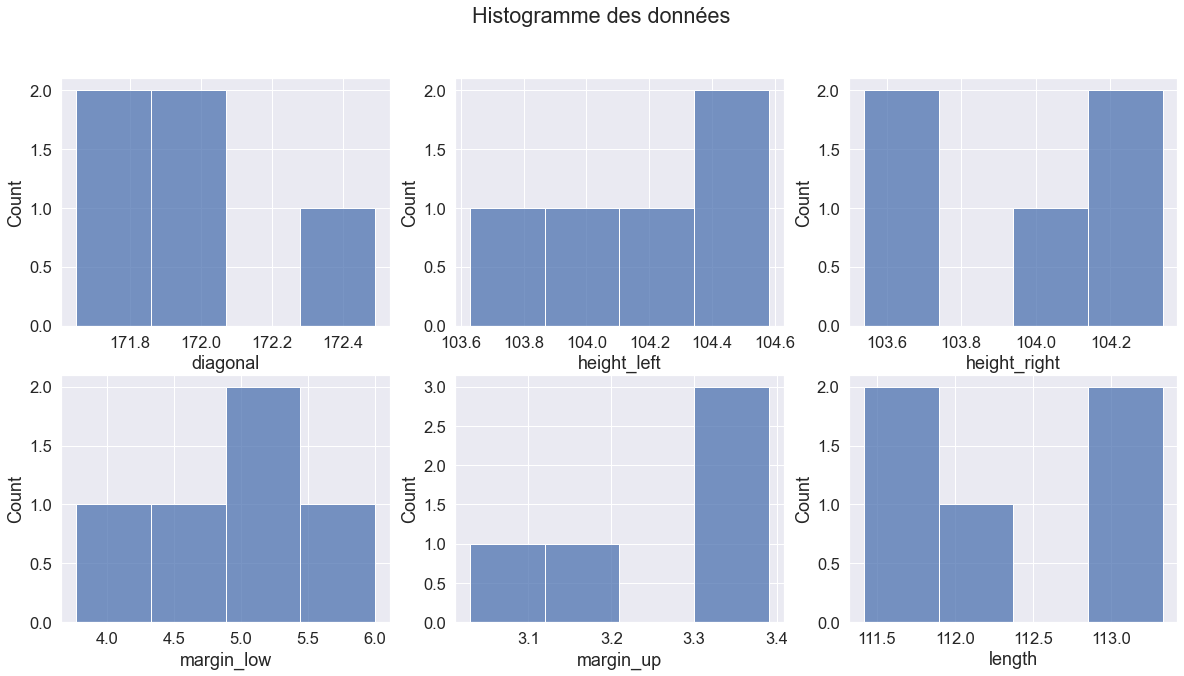

In [92]:

# Histogramme des données

plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(2,3)
fig.suptitle('Histogramme des données')

sns.set(font_scale=1.5)
sns.histplot(ax=axes[0,0],data=billets_F, x="diagonal")
sns.histplot(ax=axes[0,1],data=billets_F, x="height_left")
sns.histplot(ax=axes[0,2],data=billets_F, x="height_right")
sns.histplot(ax=axes[1,0],data=billets_F, x="margin_low")
sns.histplot(ax=axes[1,1],data=billets_F, x="margin_up")
sns.histplot(ax=axes[1,2],data=billets_F, x="length")

#plt.savefig('Output/histogramme.png')

In [93]:
# Informations statistiques des données 

infosstat = round(billets_F.describe(),3)
infosstat


,diagonal,height_left,height_right,margin_low,margin_up,length
count,5.000,5.000,5.000,5.000,5.000,5.000
mean,171.954,104.188,103.972,4.882,3.238,112.322
std,0.327,0.396,0.393,0.837,0.143,0.897
min,171.650,103.630,103.540,3.770,3.030,111.420
25%,171.760,104.010,103.560,4.440,3.160,111.570
50%,171.870,104.170,104.130,4.990,3.300,112.090
75%,172.000,104.550,104.290,5.210,3.310,113.200
max,172.490,104.580,104.340,6.000,3.390,113.330


In [94]:
# Imputation des données manquantes

billets_Imp = pd.DataFrame(Imputer_fitted.transform(billets_F), columns=billets_F.columns)

In [95]:
# Prédictions par Regression Logistique


pred_RL = logisticRegrT_fitted.predict(billets_F)
pred_RL = np.where(pred_RL == 1, 'Vrai', 'Faux')
pred_RL = pd.Series(pred_RL)

Proba_vrai_RL = logisticRegrT_fitted.predict_proba(billets_F)
Proba_vrai_RL = pd.Series(np.round(Proba_vrai_RL[:,1],2))

In [96]:
# Prédictions par KNearest Neighbors

pred_KNN = Knn_fitted.predict(billets_F)
pred_KNN = np.where(pred_KNN == True, 'Vrai', 'Faux')
pred_KNN = pd.Series(pred_KNN)


Proba_vraiknn = Knn_fitted.predict_proba(billets_F)
Proba_vraiknn = pd.Series(np.round(Proba_vraiknn[:,1],2))

In [97]:
# Génération du tableau des résultats

billets_output = pd.concat([billets,
                            pred_RL.rename('Type_billet_RL'),
                            Proba_vrai_RL.rename('Prob_Vrai_RL'),
                            pred_KNN.rename('Type_billet_KNN'),
                            Proba_vraiknn.rename('Prob_Vrai_KNN') ], axis=1)

billets_output.head(10)
#billets_output.to_csv('Output/billets_output.csv')


,diagonal,height_left,height_right,margin_low,margin_up,length,id,Type_billet_RL,Prob_Vrai_RL,Type_billet_KNN,Prob_Vrai_KNN
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Faux,0.01,Faux,0.0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Faux,0.00,Faux,0.0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Faux,0.00,Faux,0.0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,Vrai,0.91,Vrai,1.0
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,Vrai,1.00,Vrai,1.0


In [98]:
# Création d'un tableau par méthode comportant les estimations peu fiables
Seuil = 0.95

Billets_seuilRL = billets_output.query('1-@Seuil <= Prob_Vrai_RL <= @Seuil')
print(Billets_seuilRL)


Billets_seuilKNN = billets_output.query('1-@Seuil <= Prob_Vrai_KNN <= @Seuil')
print(Billets_seuilKNN)


billets_output_FiltreSeuilRL = billets_output.drop(Billets_seuilRL.index, axis=0)


billets_output_FiltreSeuilKNN = billets_output.drop(Billets_seuilKNN.index, axis=0)

   diagonal  height_left  height_right  margin_low  margin_up  length   id  \
3    172.49       104.55        104.34        4.44       3.03   113.2  A_4   

  Type_billet_RL  Prob_Vrai_RL Type_billet_KNN  Prob_Vrai_KNN  
3           Vrai          0.91            Vrai            1.0  
Empty DataFrame
Columns: [diagonal, height_left, height_right, margin_low, margin_up, length, id, Type_billet_RL, Prob_Vrai_RL, Type_billet_KNN, Prob_Vrai_KNN]
Index: []


In [99]:
# Création d'un tableau comptant les faux billets par méthode (en fonction du seuil)

Faux_billets_sum = []
FB_sum_RL = (billets_output_FiltreSeuilRL.Type_billet_RL == 'Faux').sum()
FB_sum_KNN = (billets_output_FiltreSeuilKNN.Type_billet_KNN == 'Faux').sum()
Faux_billets_sum.append([FB_sum_RL, FB_sum_KNN])
Faux_billets_sum = pd.DataFrame(Faux_billets_sum)   
Faux_billets_sum.columns = ['Faux_billets_RL','Faux_billets_KNN']

Faux_billets_sum

,Faux_billets_RL,Faux_billets_KNN
0,3,3


[Text(0.5, 0, 'Marge inf. (mm)'), Text(0, 0.5, 'Marge sup. (mm)')]

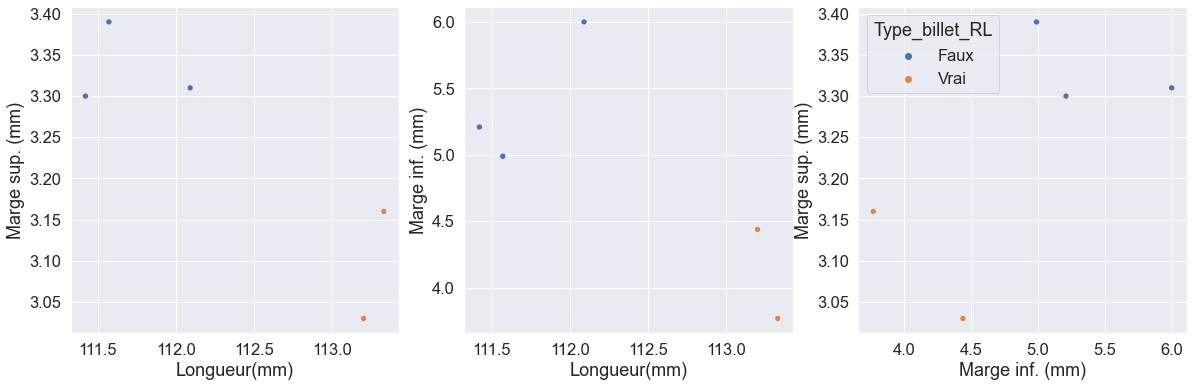

In [100]:
# Création d'une figure montrant les types de billets

fig, axs = plt.subplots(ncols=3,figsize=(20,6))

p1=sns.scatterplot(data = billets_output, x='length', y= 'margin_up', hue='Type_billet_RL',ax=axs[0],legend = False)
p1.set( xlabel = "Longueur(mm)", ylabel = "Marge sup. (mm)")

p2=sns.scatterplot(data = billets_output, x='length', y= 'margin_low', hue='Type_billet_RL',ax=axs[1],legend = False)
p2.set( xlabel = "Longueur(mm)", ylabel = "Marge inf. (mm)")

p3=sns.scatterplot(data = billets_output, x='margin_low', y='margin_up', hue='Type_billet_RL',ax=axs[2])
p3.set( xlabel = "Marge inf. (mm)", ylabel = "Marge sup. (mm)")

#plt.savefig('Output/LogisticRegression/fig2.png')

In [101]:
print("L'algorithme a detecté",Faux_billets_sum['Faux_billets_RL'].values[0],"faux billets par Régression Logistique et",Faux_billets_sum['Faux_billets_KNN'].values[0],"faux billets par la méthode des K Nearest Neighbors.")


L'algorithme a detecté 3 faux billets par Régression Logistique et 3 faux billets par la méthode des K Nearest Neighbors.


In [102]:
# Sauvegarde des données prédites
billets_output.to_csv('billets_output_Jup.csv')
